<a href="https://colab.research.google.com/github/Rahulk1619/Datasets/blob/main/Customer_Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns

In [5]:
df=pd.read_csv("Churn_Modelling.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.shape

(10000, 14)

In [8]:
df.size

140000

In [9]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [12]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df.drop(columns=["RowNumber","CustomerId","Surname"])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


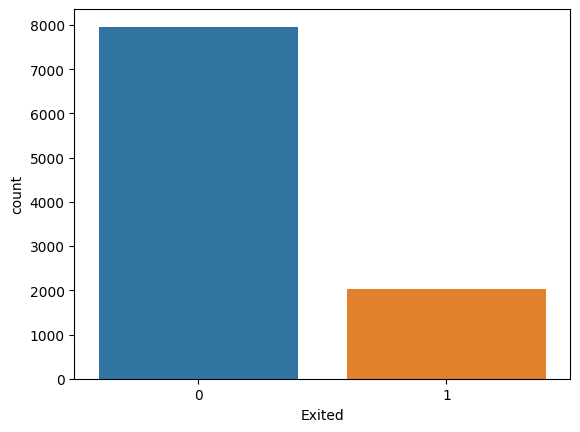

In [15]:
sns.countplot(x="Exited",data=df)
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

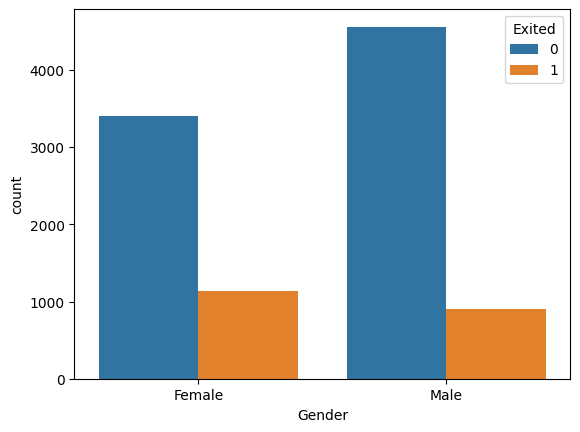

In [16]:
sns.countplot(x='Gender', hue='Exited', data=df)

<Axes: xlabel='Geography', ylabel='count'>

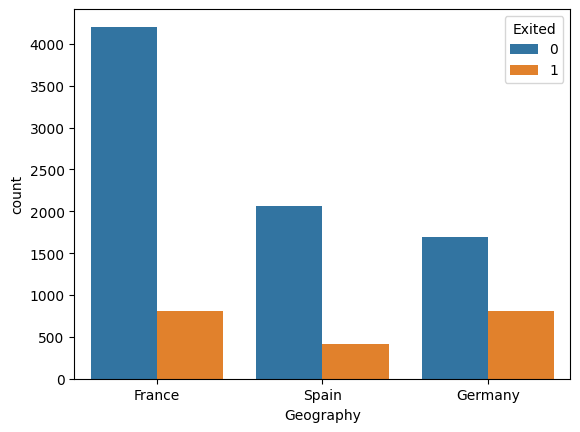

In [17]:
sns.countplot(x='Geography', hue='Exited',data=df)

In [18]:
df = df.drop("CustomerId",axis=1)

In [19]:
df.shape

(10000, 13)

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column]=le.fit_transform(df[column])

<ipython-input-21-52430de27b89>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-21-52430de27b89>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-21-52430de27b89>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-21-52430de27b89>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-21-52430de27b89>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprec

In [22]:
df

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1115,228,0,0,24,2,0.00,0,1,1,101348.88,1
1,1,1177,217,2,0,23,1,83807.86,0,0,1,112542.58,0
2,2,2040,111,0,0,24,8,159660.80,2,1,0,113931.57,1
3,3,289,308,0,0,21,1,0.00,1,0,0,93826.63,0
4,4,1822,459,2,0,25,2,125510.82,0,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1999,380,0,1,21,5,0.00,1,1,0,96270.64,0
9996,9996,1336,125,0,1,17,10,57369.61,0,1,1,101699.77,0
9997,9997,1570,318,0,0,18,7,0.00,0,0,1,42085.58,1
9998,9998,2345,381,1,1,24,3,75075.31,1,1,0,92888.52,1


In [23]:
x= df.drop("Exited",axis=1)

In [24]:
y=df.Exited

In [25]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [27]:
x_feature=ss.fit_transform(x)

In [28]:
x_feature

array([[-1.73187761, -0.46418322, -0.32733113, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.3909112 , -0.44133106, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479,  0.62898807, -1.53987591, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479,  0.07353887,  0.60539563, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 ,  0.98943914,  1.25830436, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761,  1.4692527 ,  1.46557697, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x_feature,y,test_size=0.2,random_state=1)

In [31]:
xtrain.shape

(8000, 12)

In [32]:
xtest.shape

(2000, 12)

In [33]:
ytrain.shape

(8000,)

In [34]:
ytest.shape

(2000,)

In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [36]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [37]:
lr.fit(xtest,ytest)

LogisticRegression()

In [38]:
predict=lr.predict(xtest)

In [39]:
lr.score(xtest,ytest)

0.806

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict)

0.806

In [41]:
from sklearn.metrics import confusion_matrix

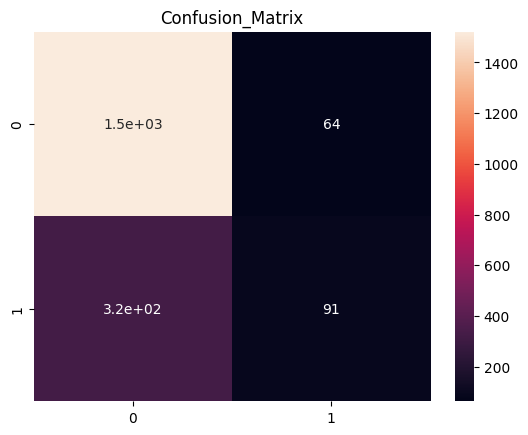

In [42]:
cm=confusion_matrix(ytest,predict)
ax=plt.axes()
sns.heatmap(cm,annot=True,
           annot_kws={'size':10},
           ax=ax)
plt.title("Confusion_Matrix")
plt.show()

In [43]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predict))
print(xtrain.shape)

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      1585
           1       0.59      0.22      0.32       415

    accuracy                           0.81      2000
   macro avg       0.71      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000

(8000, 12)


In [44]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import utils
import seaborn

In [45]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(12,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [46]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                260       
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 591 (2.31 KB)
Trainable params: 591 (2.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.7506
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.8141
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8261
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8321
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3852 - accuracy: 0.8394
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.8484
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.8490
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.8524
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3529 - accuracy: 0.8551
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3498 - accura

In [50]:
pred=model.predict(xtest)

63/63 [==============================] - 0s 2ms/step


In [51]:
score = model.evaluate(xtest,ytest)
print("Loss: ",score[0])
print("Accuracy: ",score[1])

63/63 [==============================] - 0s 3ms/step - loss: 0.3428 - accuracy: 0.8580
Loss:  0.342773973941803
Accuracy:  0.8579999804496765
